In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/breast-cancer.csv
/kaggle/input/tokentxt/token.txt


In [2]:
data=pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")

In [3]:
data.shape

(569, 32)

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.columns.value_counts().sum()

np.int64(32)

In [7]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
data.shape

(569, 32)

In [9]:
data.drop(['id'], axis=1, inplace=True) 

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
data['diagnosis']=le.fit_transform(data['diagnosis'])

In [12]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [18]:
K_range=range(1,31)
cv_scores=[]
for k in K_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train_scaled,y_train,cv=5,scoring='accuracy',n_jobs=-1)
    cv_scores.append(scores.mean())

In [19]:
best_k = K_range[np.argmax(cv_scores)]
best_k

5

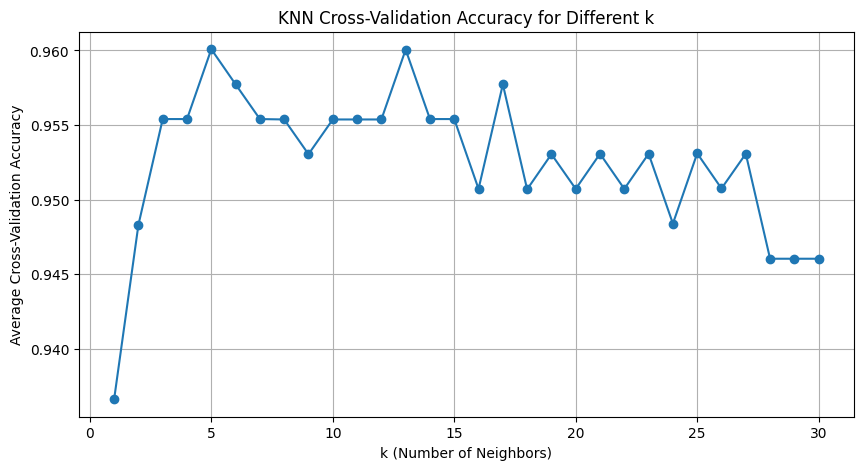

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(K_range, cv_scores, marker='o')
plt.title("KNN Cross-Validation Accuracy for Different k")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Average Cross-Validation Accuracy")
plt.grid(True)
plt.show()

In [21]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [22]:
y_pred=knn.predict(X_test_scaled)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.958041958041958

Confusion Matrix:
 [[86  3]
 [ 3 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [26]:
results_df = pd.DataFrame({
    
    'actual_diagnosis': y_test,
    'predicted_diagnosis': y_pred
})

# Save to CSV
results_df.to_csv("result.csv", index=False)

In [31]:
import requests
import base64
from kaggle_secrets import UserSecretsClient

# Step 1: Get GitHub token
user_secrets = UserSecretsClient()
token = user_secrets.get_secret("GITHUB_TOKEN")

# Step 2: Set your GitHub details
username = "SmitSutariya0205"               # Replace with your GitHub username
repo = "newrepo"                     # Replace with your actual GitHub repo
file_path = "result.csv"                    # File you want to upload
branch = "main"                             # Or your working branch

# Step 3: Read content and encode to Base64
with open(file_path, "r") as file:
    content = file.read()

encoded = base64.b64encode(content.encode()).decode()

# Step 4: Prepare GitHub API URL
url = f"https://api.github.com/repos/{username}/{repo}/contents/{file_path}"

# Step 5: Get existing file SHA (needed if file exists)
res = requests.get(url, headers={"Authorization": f"token {token}"})
sha = res.json().get("sha") if res.status_code == 200 else None

# Step 6: Prepare payload
payload = {
    "message": "Upload result.csv from Kaggle notebook",
    "content": encoded,
    "branch": branch
}
if sha:
    payload["sha"] = sha  # Required if updating an existing file

# Step 7: Make the PUT request
res = requests.put(url, headers={"Authorization": f"token {token}"}, json=payload)

# Step 8: Check result
if res.status_code in [200, 201]:
    print("✅ result.csv uploaded successfully!")
else:
    print("❌ Upload failed:", res.status_code)
    print(res.json())


✅ result.csv uploaded successfully!
